In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

"done"

'done'

# README

This notebook plots normalized histograms of selected partial charges.

It also analyses the histograms.

In [2]:
# read
std_cl = pd.read_csv("../chlorine/punches.csv")
std_br = pd.read_csv("../bromine/punches.csv")
std_i = pd.read_csv("../iodine/punches.csv")
stds = [std_cl, std_br, std_i]

mod_cl = pd.read_csv("../chlorine/punches-mod.csv")
mod_br = pd.read_csv("../bromine/punches-mod.csv")
mod_i = pd.read_csv("../iodine/punches-mod.csv")
mods = [mod_cl, mod_br, mod_i]

# histograms of charges

In [3]:
# styling plots,
matplotlib.rcParams["font.family"] = "Open Sans"
matplotlib.rcParams["font.size"] = 6
matplotlib.rcParams["lines.linewidth"] = 1
matplotlib.rcParams["axes.grid"] = True
matplotlib.rcParams["axes.grid.axis"] = "y"
matplotlib.rcParams["axes.spines.top"] = False
matplotlib.rcParams["axes.spines.right"] = False
matplotlib.rcParams["axes.spines.left"] = False
matplotlib.rcParams["grid.color"] = "grey"
matplotlib.rcParams["grid.linestyle"] = "dotted"

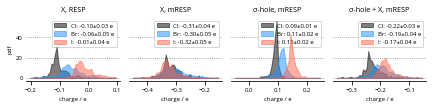

In [5]:
# three plots
# some setup
hist_bins = 50
hals = "cl br i".split()
colors = "black dodgerblue tomato".split()

# initialize figure
fig, axs= plt.subplots(nrows=1, ncols=4, figsize=(6,1.5), sharey=True)
left, midleft, midright, right = axs


# left
for hal_id, hal in enumerate(hals):
    
    # histogram
    charges = stds[hal_id]["q_x"]
    hist_range = (-0.2,0.1)
    hist, edges = np.histogram(charges, bins=hist_bins, range=hist_range, density=True)
    
    # plot
    left.fill_between(edges[:-1], hist, color=colors[hal_id], alpha=0.5, zorder=9,
                    label=f"{hal.capitalize()}: {charges.mean():.2f}±{charges.std():.2f} e")

left.set_title("X, RESP")
left.set_xlabel("charge / e")
left.tick_params(length=0, axis="y")
left.set_ylabel("pdf")
left.legend()


# midleft
for hal_id, hal in enumerate(hals):
    
    # histogram
    charges = mods[hal_id]["q_x"]
    hist_range = (-0.45, -0.15)
    hist, edges = np.histogram(charges, bins=hist_bins, range=hist_range, density=True)
    
    # plot
    midleft.fill_between(edges[:-1], hist, color=colors[hal_id], alpha=0.5, zorder=9,
                    label=f"{hal.capitalize()}: {charges.mean():.2f}±{charges.std():.2f} e")

midleft.set_title("X, mRESP")
midleft.set_xlabel("charge / e")
midleft.tick_params(length=0, axis="y")
midleft.legend()


# midright
for hal_id, hal in enumerate(hals):
    
    # histogram
    charges = mods[hal_id]["q_sigma"]
    hist_range = (-0.05,0.25)
    hist, edges = np.histogram(charges, bins=hist_bins, range=hist_range, density=True)
    
    # plot
    midright.fill_between(edges[:-1], hist, color=colors[hal_id], alpha=0.5, zorder=9,
                    label=f"{hal.capitalize()}: {charges.mean():.2f}±{charges.std():.2f} e")

midright.set_title("σ-hole, mRESP")
midright.set_xlabel("charge / e")
midright.tick_params(length=0, axis="y")
midright.legend()


# right
for hal_id, hal in enumerate(hals):
    
    # histogram
    charges = mods[hal_id]["q_x"] + mods[hal_id]["q_sigma"]
    hist_range = (-0.35,-0.05)
    hist, edges = np.histogram(charges, bins=hist_bins, range=hist_range, density=True)
    
    # plot
    right.fill_between(edges[:-1], hist, color=colors[hal_id], alpha=0.5, zorder=99,
                    label=f"{hal.capitalize()}: {charges.mean():.2f}±{charges.std():.2f} e")

right.set_title("σ-hole + X, mRESP")
right.set_xlabel("charge / e")
right.tick_params(length=0, axis="y")
right.legend()


plt.tight_layout()
for ext in "png pdf".split():
    plt.savefig(f"../charges-hist.{ext}", dpi=300)

# fraction of positive halogen in RESP

In [6]:
for hal_id, hal in enumerate(hals):
    df = stds[hal_id]
    n_mols = len(df)
    n_positive_x = len(df[df["q_x"]>=0])
    print(f"{hal.capitalize()}: {n_positive_x} / {n_mols} = {n_positive_x/n_mols*100:.3f} %")

Cl: 3 / 276 = 1.087 %
Br: 119 / 1120 = 10.625 %
I: 295 / 915 = 32.240 %


# fraction of positive halogen in mRESP (halogen+sigma)

In [7]:
for hal_id, hal in enumerate(hals):
    df = mods[hal_id]
    n_mols = len(df)
    n_positive_x = len(df[df["q_x"] + df["q_sigma"] >= 0])
    print(f"{hal.capitalize()}: {n_positive_x} / {n_mols} = {n_positive_x/n_mols*100:.3f} %")

Cl: 0 / 276 = 0.000 %
Br: 2 / 1120 = 0.179 %
I: 2 / 915 = 0.219 %


# fraction of positive sigma-hole in mRESP

In [8]:
for hal_id, hal in enumerate(hals):
    df = mods[hal_id]
    n_mols = len(df)
    n_positive_x = len(df[df["q_sigma"]>=0])
    print(f"{hal.capitalize()}: {n_positive_x} / {n_mols} = {n_positive_x/n_mols*100:.3f} %")

Cl: 276 / 276 = 100.000 %
Br: 1120 / 1120 = 100.000 %
I: 915 / 915 = 100.000 %


In [9]:
s = 0
for hal_id, hal in enumerate(hals):
    df = mods[hal_id]
    s += len(df)
print(s)

2311
